In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression, Ridge, Lasso

           X         y
0   1.047198  1.065763
1   1.117011  1.006086
2   1.186824  0.695374
3   1.256637  0.949799
4   1.326450  1.063496
5   1.396263  0.876795
6   1.466077  1.034349
7   1.535890  1.015673
8   1.605703  1.000035
9   1.675516  0.968332
10  1.745329  1.049762
11  1.815142  1.150751
12  1.884956  0.806297
13  1.954769  1.081425
14  2.024582  0.933089
15  2.094395  0.932796
16  2.164208  0.658547
17  2.234021  0.808281
18  2.303835  0.965825
19  2.373648  0.532688
20  2.443461  0.346128
21  2.513274  0.326279
22  2.583087  0.569830
23  2.652900  0.827217
24  2.722714  0.575290
25  2.792527  0.592913
26  2.862340  0.290510
27  2.932153  0.417611
28  3.001966  0.098486
29  3.071779  0.161737
30  3.141593 -0.040098
31  3.211406 -0.152153
32  3.281219 -0.119267
33  3.351032 -0.279333
34  3.420845 -0.079366
35  3.490659 -0.312768
36  3.560472 -0.346705
37  3.630285 -0.520116
38  3.700098 -0.341448
39  3.769911 -0.697581
40  3.839724 -0.543753
41  3.909538 -0.747289
42  3.97935

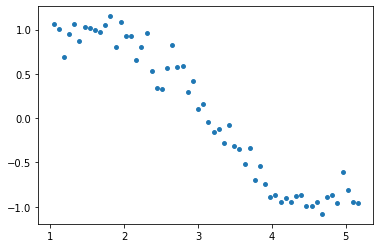

In [18]:
x = np.array([i * np.pi/180 for i in range(60, 300, 4)])

random.seed(10)
np.random.seed(10)

y = np.sin(x) + np.random.normal(0, 0.15, len(x))

data = pd.DataFrame(np.column_stack([x, y]), columns=['X', 'y'])
print(data)
plt.scatter(data['X'], data['y'], s=15)
plt.show()

In [19]:
len(x)

60

In [20]:
for i in range(2, 16):
  col_name = 'X_%d'%i #이름 붙이기
  data[col_name] = data['X']**i



for i in range(1, 16):
  
  if i == 1:
    data_ = x
  else:
    data_ = np.column_stack([data_, data['X_'+str(i)]])

data_ = np.column_stack([data_, data['y']])
print(data)

           X         y        X_2         X_3         X_4          X_5  \
0   1.047198  1.065763   1.096623    1.148381    1.202581     1.259340   
1   1.117011  1.006086   1.247713    1.393709    1.556788     1.738948   
2   1.186824  0.695374   1.408551    1.671702    1.984016     2.354677   
3   1.256637  0.949799   1.579137    1.984402    2.493673     3.133642   
4   1.326450  1.063496   1.759470    2.333850    3.095735     4.106339   
5   1.396263  0.876795   1.949551    2.722087    3.800751     5.306850   
6   1.466077  1.034349   2.149381    3.151156    4.619837     6.773034   
7   1.535890  1.015673   2.358957    3.623098    5.564680     8.546734   
8   1.605703  1.000035   2.578282    4.139955    6.647537    10.673970   
9   1.675516  0.968332   2.807354    4.703767    7.881237    13.205140   
10  1.745329  1.049762   3.046174    5.316577    9.279177    16.195219   
11  1.815142  1.150751   3.294742    5.980426   10.855325    19.703961   
12  1.884956  0.806297   3.553058    6

In [21]:
X = data_[:, :15]  # 적합에 사용할 X
Y = data_[:, 15:]  # target 값 Y
print(X,Y)

[[1.04719755e+00 1.09662271e+00 1.14838062e+00 1.20258137e+00
  1.25934027e+00 1.31877804e+00 1.38102114e+00 1.44620195e+00
  1.51445914e+00 1.58593791e+00 1.66079029e+00 1.73917553e+00
  1.82126035e+00 1.90721938e+00 1.99723547e+00]
 [1.11701072e+00 1.24771295e+00 1.39370874e+00 1.55678761e+00
  1.73894845e+00 1.94242406e+00 2.16970850e+00 2.42358766e+00
  2.70717340e+00 3.02394171e+00 3.37777531e+00 3.77301124e+00
  4.21449401e+00 4.70763499e+00 5.25847875e+00]
 [1.18682389e+00 1.40855095e+00 1.67170192e+00 1.98401578e+00
  2.35467732e+00 2.79458730e+00 3.31668298e+00 3.93631860e+00
  4.67171696e+00 5.54450530e+00 6.58035136e+00 7.80971820e+00
  9.26876015e+00 1.10003860e+01 1.30555209e+01]
 [1.25663706e+00 1.57913670e+00 1.98440171e+00 2.49367273e+00
  3.13364157e+00 3.93785014e+00 4.94844842e+00 6.21840369e+00
  7.81427654e+00 9.81970950e+00 1.23398109e+01 1.55066637e+01
  1.94862483e+01 2.44871418e+01 3.07714499e+01]
 [1.32645023e+00 1.75947022e+00 2.33384968e+00 3.09573544e+00
  

In [22]:
LR = LinearRegression().fit(X,Y)

LR_coef = list(LR.coef_.reshape(15,)) # list로 변환

print('Linear Regression의 coefficient')
print(LR.coef_)
print('Linear Regression의 intercept')
print(LR.intercept_)

Linear Regression의 coefficient
[[ 9.73625777e+02 -1.10258353e+03 -4.82454038e+01  1.01425629e+03
  -4.54607780e+02 -7.08968151e+02  1.12911296e+03 -7.95818922e+02
   3.49499020e+02 -1.03967204e+02  2.14205801e+01 -3.02503389e+00
   2.80263049e-01 -1.53746730e-02  3.78998231e-04]]
Linear Regression의 intercept
[-269.88309775]


In [23]:
ridge = Ridge(tol=0.1).fit(X,Y)
ridge_coef = list(ridge.coef_.reshape(15,))

print('Ridge의 coefficient')
print(ridge.coef_)
print('Ridge의 intercept')
print(ridge.intercept_)

Ridge의 coefficient
[[ 7.12806673e-03  1.75308097e-02  2.63113175e-02  2.61612101e-02
   1.21494842e-02 -9.81348116e-03 -1.96761746e-02 -2.50377626e-03
   1.60284591e-02 -7.32777423e-03  5.33204901e-04  4.53076427e-04
  -1.44252273e-04  1.73759465e-05 -7.78285156e-07]]
Ridge의 intercept
[0.86933254]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.86695e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [24]:
lasso = Lasso(tol=0.1).fit(X,Y)
lasso_coef = list(lasso.coef_)

print('Lasso의 coefficient')
print(lasso.coef_)
print('Lasso의 intercept')
print(lasso.intercept_)

Lasso의 coefficient
[-0.00000000e+00 -0.00000000e+00 -2.87274503e-02 -4.78819079e-04
  7.48718507e-05  2.68464768e-05  4.13603963e-06  6.54514515e-07
  1.03374328e-07  1.61861326e-08  2.50706818e-09  3.83323864e-10
  5.76603660e-11  8.48567304e-12  1.21044069e-12]
Lasso의 intercept
[0.99113054]


In [26]:
coef = pd.DataFrame(np.column_stack([LR_coef, ridge_coef, lasso_coef]))
coef.columns = ['LR', 'Ridge', 'Lasso']
coef.index = ['X_'+ str(i) for i in range(1,16)]
coef

,LR,Ridge,Lasso
X_1,973.625777,7.128067e-03,-0.000000e+00
X_2,-1102.583527,1.753081e-02,-0.000000e+00
X_3,-48.245404,2.631132e-02,-2.872745e-02
X_4,1014.256291,2.616121e-02,-4.788191e-04
X_5,-454.607780,1.214948e-02,7.487185e-05
X_6,-708.968151,-9.813481e-03,2.684648e-05
X_7,1129.112959,-1.967617e-02,4.136040e-06
X_8,-795.818922,-2.503776e-03,6.545145e-07
X_9,349.499020,1.602846e-02,1.033743e-07
X_10,-103.967204,-7.327774e-03,1.618613e-08


In [ ]:
alpha_set = [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
ridge_alpha = []

for i in range(len(alpha_set)):
    ridge = Ridge(tol=0.1).fit(X,Y, alpha_set[i])
    ridge = ridge.coef_.reshape(15,)
    ridge_alpha.append(ridge)
    
ridge_alpha = pd.DataFrame(ridge_alpha)
ridge_alpha.index = ['alpha : '+str(i) for i in alpha_set]
ridge_alpha.columns = ['X_'+str(i) for i in range(1,16)]
ridge_alpha

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.65728e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.20992e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.48215e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.86695e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
alpha : 1e-10,-3.496148e-10,-1.513835e-09,-5.064629e-09,-1.533415e-08,-4.376711e-08,-1.189466e-07,-3.066466e-07,-7.393631e-07,-0.000002,-0.000003,-0.000004,-0.000003,0.000003,-7.189607e-07,5.060723e-08
alpha : 1e-08,-1.605676e-08,-6.556986e-08,-2.041199e-07,-5.665854e-07,-1.456928e-06,-3.488674e-06,-7.683287e-06,-1.509668e-05,-0.000025,-0.000030,-0.000013,0.000023,-0.000008,9.937355e-07,-4.725590e-08
alpha : 0.0001,3.004791e-06,3.957822e-06,-2.748155e-06,-2.702713e-05,-8.150971e-05,-1.723525e-04,-2.778791e-04,-3.242363e-04,-0.000207,0.000060,0.000165,-0.000102,0.000024,-2.662971e-06,1.122922e-07
alpha : 0.001,5.506174e-05,1.222499e-04,1.768997e-04,1.705151e-04,4.113968e-05,-2.351259e-04,-5.438475e-04,-5.764107e-04,-0.000093,0.000386,-0.000141,0.000013,0.000002,-4.522711e-07,2.313923e-08
alpha : 0.01,5.415017e-04,1.260127e-03,1.991258e-03,2.377126e-03,1.923580e-03,3.494529e-04,-1.713648e-03,-2.312640e-03,0.000099,0.002241,-0.001588,0.000510,-0.000089,8.165461e-06,-3.129509e-07
alpha : 1,7.128067e-03,1.753081e-02,2.631132e-02,2.616121e-02,1.214948e-02,-9.813481e-03,-1.967617e-02,-2.503776e-03,0.016028,-0.007328,0.000533,0.000453,-0.000144,1.737595e-05,-7.782852e-07
alpha : 5,5.297953e-03,2.529205e-02,4.573123e-02,4.543300e-02,1.271550e-02,-3.064479e-02,-3.244526e-02,1.837976e-02,0.015522,-0.015698,0.005540,-0.000963,0.000077,-1.114268e-06,-1.318993e-07
alpha : 10,-8.118661e-03,1.595344e-02,5.103458e-02,6.167341e-02,2.341226e-02,-3.809568e-02,-4.772931e-02,1.646234e-02,0.039645,-0.036639,0.014371,-0.003114,0.000387,-2.563470e-05,6.959250e-07
alpha : 20,-2.903719e-02,4.808990e-03,6.341453e-02,8.329801e-02,2.362704e-02,-6.478418e-02,-5.421045e-02,5.975355e-02,-0.000463,-0.017239,0.008609,-0.002023,0.000257,-1.688051e-05,4.366501e-07


In [ ]:
alpha_set = [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
lasso_alpha = []

for i in range(len(alpha_set)):
    lasso = Lasso(tol=0.1).fit(X,Y, alpha_set[i])
    lasso = lasso.coef_.reshape(15,)
    lasso_alpha.append(lasso)
    
lasso_alpha = pd.DataFrame(lasso_alpha)
lasso_alpha.index = ['alpha : '+str(i) for i in alpha_set]
lasso_alpha.columns = ['X_'+str(i) for i in range(1,16)]
lasso_alpha

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
alpha : 1e-10,-0.0,-0.0,-0.028727,-0.000479,0.000075,0.000027,0.000004,6.545145e-07,1.033743e-07,1.618613e-08,2.507068e-09,3.833239e-10,5.766037e-11,8.485673e-12,1.210441e-12
alpha : 1e-08,-0.0,-0.0,-0.028727,-0.000479,0.000075,0.000027,0.000004,6.545145e-07,1.033743e-07,1.618613e-08,2.507068e-09,3.833239e-10,5.766037e-11,8.485673e-12,1.210441e-12
alpha : 0.0001,-0.0,-0.0,-0.028727,-0.000479,0.000075,0.000027,0.000004,6.545145e-07,1.033743e-07,1.618613e-08,2.507068e-09,3.833239e-10,5.766037e-11,8.485673e-12,1.210441e-12
alpha : 0.001,-0.0,-0.0,-0.028727,-0.000479,0.000075,0.000027,0.000004,6.545145e-07,1.033743e-07,1.618613e-08,2.507068e-09,3.833239e-10,5.766037e-11,8.485673e-12,1.210441e-12
alpha : 0.01,-0.0,-0.0,-0.028727,-0.000479,0.000075,0.000027,0.000004,6.545145e-07,1.033743e-07,1.618613e-08,2.507068e-09,3.833239e-10,5.766037e-11,8.485673e-12,1.210441e-12
alpha : 1,-0.0,-0.0,-0.028727,-0.000479,0.000075,0.000027,0.000004,6.545145e-07,1.033743e-07,1.618613e-08,2.507068e-09,3.833239e-10,5.766037e-11,8.485673e-12,1.210441e-12
alpha : 5,-0.0,-0.0,-0.028727,-0.000479,0.000075,0.000027,0.000004,6.545145e-07,1.033743e-07,1.618613e-08,2.507068e-09,3.833239e-10,5.766037e-11,8.485673e-12,1.210441e-12
alpha : 10,-0.0,-0.0,-0.028727,-0.000479,0.000075,0.000027,0.000004,6.545145e-07,1.033743e-07,1.618613e-08,2.507068e-09,3.833239e-10,5.766037e-11,8.485673e-12,1.210441e-12
alpha : 20,-0.0,-0.0,-0.028727,-0.000479,0.000075,0.000027,0.000004,6.545145e-07,1.033743e-07,1.618613e-08,2.507068e-09,3.833239e-10,5.766037e-11,8.485673e-12,1.210441e-12


## 실습
- 아래 데이터셋으로 각각 결과를 출력하시오

1. 전체 변수를 사용했을 때의 linear regression 회귀 계수

2. 전체 변수를 사용했을 때의 ridge regression 회귀 계수

3. 전체 변수를 사용했을 때의 lasso regression 회귀 계수


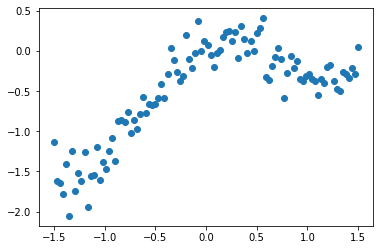

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,-1.500000,2.250000,-3.375000,5.062500,-7.593750,11.390625,-17.085938,25.628906,-38.443359,57.665039,-86.497559,129.746338,-194.619507,291.929260,-437.893890
1,-1.469697,2.160009,-3.174559,4.665640,-6.857076,10.077825,-14.811348,21.768194,-31.992648,47.019498,-69.104414,101.562547,-149.266168,219.376035,-322.416293
2,-1.439394,2.071855,-2.982215,4.292583,-6.178718,8.893609,-12.801406,18.426267,-26.522657,38.176552,-54.951097,79.096276,-113.850700,163.876008,-235.882133
3,-1.409091,1.985537,-2.797802,3.942358,-5.555141,7.827698,-11.029939,15.542186,-21.900353,30.859588,-43.483966,61.272861,-86.339031,121.659543,-171.429357
4,-1.378788,1.901056,-2.621153,3.614014,-4.982959,6.870443,-9.472884,13.061097,-18.008482,24.829877,-34.235133,47.202987,-65.082906,89.735522,-123.726250
5,-1.348485,1.818411,-2.452100,3.306620,-4.458927,6.012795,-8.108164,10.933736,-14.743977,19.882029,-26.810615,36.153709,-48.752728,65.742315,-88.652516
6,-1.318182,1.737603,-2.290477,3.019265,-3.979941,5.246285,-6.915558,9.115963,-12.016496,15.839927,-20.879904,27.523509,-36.280989,47.824941,-63.041967
7,-1.287879,1.658632,-2.136117,2.751059,-3.543031,4.562994,-5.876584,7.568328,-9.747089,12.553069,-16.166831,20.820918,-26.814819,34.534237,-44.475911
8,-1.257576,1.581497,-1.988852,2.501132,-3.145363,3.955532,-4.974382,6.255662,-7.866969,9.893309,-12.441585,15.646236,-19.676327,24.744472,-31.118048
9,-1.227273,1.506198,-1.848516,2.268633,-2.784232,3.417012,-4.193606,5.146698,-6.316402,7.751948,-9.513754,11.675971,-14.329601,17.586328,-21.583221


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

random.seed(1)
np.random.seed(1)

x = np.linspace(-1.5, 1.5, 100) # 총 100개의 데이터
y = np.sin(0.5*x) - np.sin(x**2) + np.random.normal(0, 0.2, 100) #평균이 0이고 분산이 0.2임, 100개 뽑겠다.


x = x[:, np.newaxis] # newaxis는 차원을 늘려준다.
y = y[:, np.newaxis]


polynomial_features = PolynomialFeatures(degree = 15, include_bias=False)  #다항회귀, polynominal_features, 차수가 15
x_poly = polynomial_features.fit_transform(x)

plt.scatter(x, y)
plt.show()

df= pd.DataFrame(x_poly, columns = ['x_%d'%i for i in range(1, 16)])
df.head(20)

Linear Regression의 coefficient
[[  0.21866785  -0.11956394   6.24135978  -8.59810354 -27.84924604
   26.01884539  51.80926983 -35.77212272 -48.75655762  25.17005842
   24.44136599  -8.75216493  -6.21602322   1.19127295   0.62908712]]
Linear Regression의 intercept
[0.03164673]


In [62]:
LR = LinearRegression().fit(x_poly,y) #다항회귀

LR_coef = list(LR.coef_.reshape(15,)) # list로 변환, 데이터프레임의 형태로 뽑으려고 한거임

print('Linear Regression의 coefficient')
print(LR.coef_)
print('Linear Regression의 intercept')
print(LR.intercept_)

Linear Regression의 coefficient
[[  0.21866785  -0.11956394   6.24135978  -8.59810354 -27.84924604
   26.01884539  51.80926983 -35.77212272 -48.75655762  25.17005842
   24.44136599  -8.75216493  -6.21602322   1.19127295   0.62908712]]
Linear Regression의 intercept
[0.03164673]


In [51]:
ridge = Ridge(tol=0.1).fit(x_poly,y)
ridge_coef = list(ridge.coef_.reshape(15,))

print('Ridge의 coefficient')
print(ridge.coef_)
print('Ridge의 intercept')
print(ridge.intercept_)

Ridge의 coefficient
[[ 0.4773852  -0.67197231  0.04689614 -0.25799206 -0.00712354  0.01284798
  -0.00668918  0.136579   -0.00947187  0.08653279 -0.00761026 -0.10722975
   0.01575017  0.02553181 -0.00486859]]
Ridge의 intercept
[-0.03277999]


In [54]:
lasso = Lasso(tol=0.1).fit(x_poly,y)
lasso_coef = list(lasso.coef_)

print('Lasso의 coefficient')
print(lasso.coef_)
print('Lasso의 intercept')
print(lasso.intercept_)

Lasso의 coefficient
[ 0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.0078495  -0.00346225
  0.00140561 -0.00042101  0.        ]
Lasso의 intercept
[-0.46092433]


In [64]:
coef = pd.DataFrame(np.column_stack([LR_coef, ridge_coef, lasso_coef]))
coef.columns = ['LR', 'Ridge', 'Lasso']
coef.index = ['X_'+ str(i) for i in range(1,16)]
coef 

,LR,Ridge,Lasso
X_1,0.218668,0.477385,0.000000
X_2,-0.119564,-0.671972,-0.000000
X_3,6.241360,0.046896,0.000000
X_4,-8.598104,-0.257992,-0.000000
X_5,-27.849246,-0.007124,0.000000
X_6,26.018845,0.012848,-0.000000
X_7,51.809270,-0.006689,0.000000
X_8,-35.772123,0.136579,-0.000000
X_9,-48.756558,-0.009472,0.000000
X_10,25.170058,0.086533,-0.000000
